# Elastic Properties

Post-processing and visualization of CRYSTAL output by keyword 'ELASCON'.

## 'crystal_io.Crystal_output.get_elatensor()' method
Get output objects.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

e1d = Crystal_output('elastic1D_Ctube.out')
e2d = Crystal_output('elastic2D_graphene.out')
e3d = Crystal_output('elastic3D_ZIF8_P0.out')

Dimensionality:

- 3D: 6\*6 stiffness tensor in Voigt representation. Unit: GPa.  
- 2D: 3\*3 stiffness tensor in Voigt representation. The standard periodic boundary condition of CRYSTAL is used (xy periodic). Unit: GPa.m.  
- 1D: 1\*1 Hook constant. Unit: GPa.m$^{2}$.  

In [2]:
print('1D:')
print(e1d.get_elatensor())
print('2D:')
print(e2d.get_elatensor())
print('3D:')
print(e3d.get_elatensor())

1D:
[[5.02500012e-16]]
2D:
[[4.273 0.529 0.   ]
 [0.529 4.273 0.   ]
 [0.    0.    1.872]]
3D:
[[12.076  9.273  9.273  0.     0.     0.   ]
 [ 9.273 12.076  9.273  0.     0.     0.   ]
 [ 9.273  9.273 12.076  0.     0.     0.   ]
 [ 0.     0.     0.     1.213  0.     0.   ]
 [ 0.     0.     0.     0.     1.213  0.   ]
 [ 0.     0.     0.     0.     0.     1.213]]


## 'elastics' module

The elastics module is developed in the object-oriented way. It contains plotting and manipulation functions.

**NOTE** Not available to 1D and 0D systems.

### Instantiation
2 instantiation methods are given: from wrapper function `tensor_from_file()` or directly calling class method `Tensor2D.from_file()`.

In [3]:
from CRYSTALpytools.elastics import *

t3d = tensor_from_file('elastic3D_ZIF8_P0.out', conventional_lattice=True)
t2d = Tensor2D.from_file('elastic2D_graphene.out')

print('3D tensor: ', type(t3d))
print('2D tensor: ', type(t2d))

3D tensor:  <class 'CRYSTALpytools.elastics.Tensor3D'>
2D tensor:  <class 'CRYSTALpytools.elastics.Tensor2D'>


### Analysis

Available properties include:

- Young's modulus  
- Linear compressibility  
- Shear modulus (in-plane, averaged, max, min)  
- Poisson ratio (in-plane, averaged, max, min)

For details, please refer to module-specific documentations. 

Get Young's modulus (GPa) along \[0 1 1\] and \[0 1 0\] directions:

In [4]:
print(t3d.get_1D('young', [[0, 1, 1], [0, 1, 0]], use_cartesian=False))

[3.61734169 4.02049117]


Get averaged Poisson ratio on the plane perpendicular to \[1 0 0\] direction:

In [5]:
print(t3d.get_1D('poisson avg', [1, 0, 0], use_cartesian=False))

0.43435289709119884


Get shear modulus (GPa) between \[1 0 0\] and \[0 0 1\]:

In [6]:
print(t3d.get_pair('shear', [1, 0, 0], [0, 0, 1], use_cartesian=False))

1.213


## Plot

For 3D systems, the user can plot 3D surface of elastic properties and 2D loops on lattice planes. Vectors along specific directions can be annotated.

For 2D systems, the user can plot 2D loops on the \[0 0 1\] surface. Vectors along specific directions can be annotated.

For details, please refer to module-specific documentations.

### 3D surface plot

Plot Young's modulus on a sphere. Lattice is added to indicate the orientation.

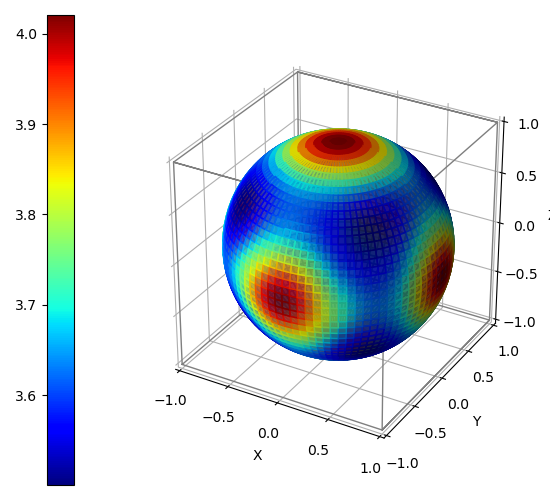

In [7]:
%matplotlib widget

fig, ax = t3d.plot_3D('young', scale_radius=False,
                      plot_lattice=True, plot_lib='matplotlib')

If the ``%matplotlib widget`` is not available, or you are simply tired of matplotlib, plotly is used to generate interactive 3D plots. But this option is only available for 3D plots.

Sphere radius is scaled by elastic properties. Vectors are added to indicate the maximum and minimum directions of averaged shear modulus.

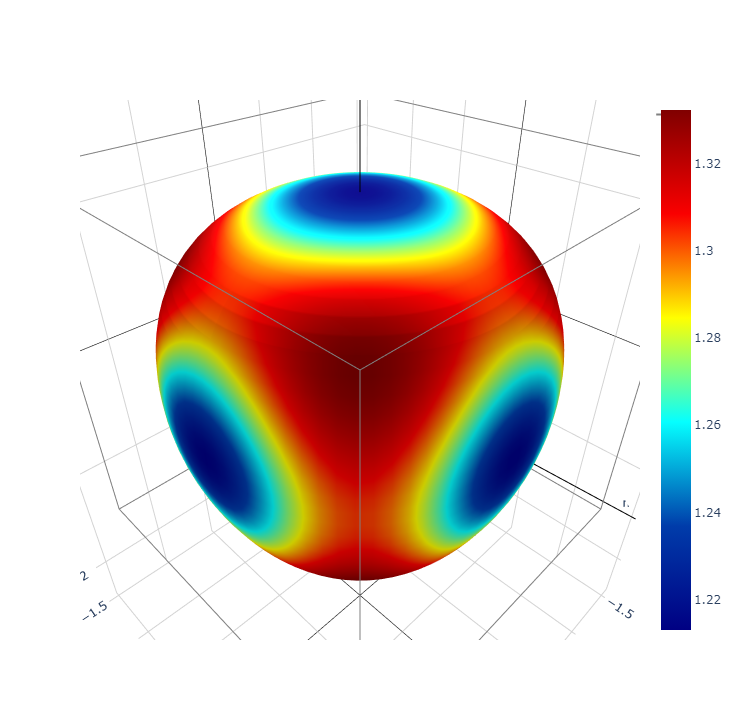

In [8]:
fig, ax = t3d.plot_3D('shear avg', scale_radius=True, u='bothends', utext=['max', 'min'],
                      plot_lattice=True, plot_lib='plotly')
fig.show()

### 2D pole charts

Pole charts are useful to study the cross-section of 3D systems, or elastic properties of 2D systems.

Plot shear modulus on the \(1 1 1\) and \(0 1 0\) planes of ZIF8, i.e., between the in-plane vector and the norm vector (unit: GPa):

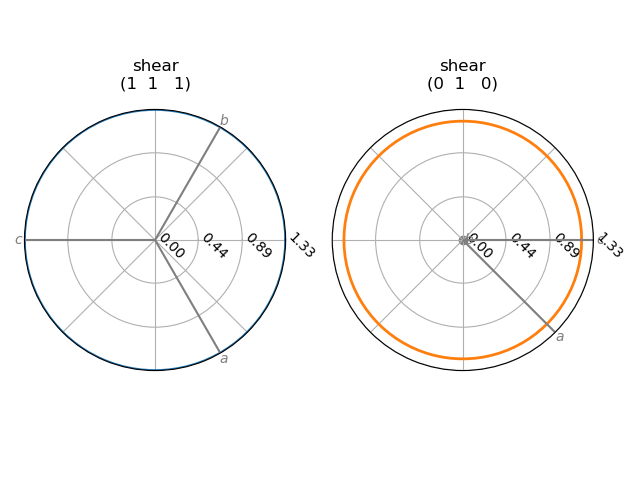

In [9]:
fig, ax = t3d.plot_2D('shear', plane=[[1, 1, 1], [0, 1, 0]], plane_definition='miller',
                      uniform_scale=True)

Note that lattice vectors are annotated to indicate the orientations.

Plot the Young's modulus of graphene and annotate the vector along \[1 1\] direction (unit: GPa.m):

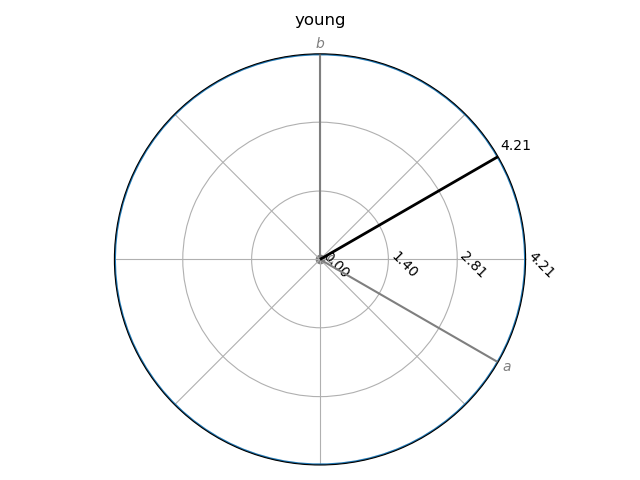

In [10]:
fig, ax = t2d.plot_2D('young', u=[1,1], utext='value', use_cartesian=False)

## 'plot.plot_elastics_3D()' and 'plot.plot_elastics_2D()' functions

These 2 functions offer a higher-level of control, which enables plotting multiple properties based on multiple tensors for comparison. ``plot_elastics_3D`` returns to a list of figure objects; while ``plot_elastics_2D`` can plot 2D charts together for 2D systems. Refer to module specific documentations for details.

Only matplotlib is used for plotting.

### Collection of 3D plots
Plot Young's modulus of ZIF8 under pressures and annotate the max values. Parameters can be passed to ``Tensor3D.plot_3D``:

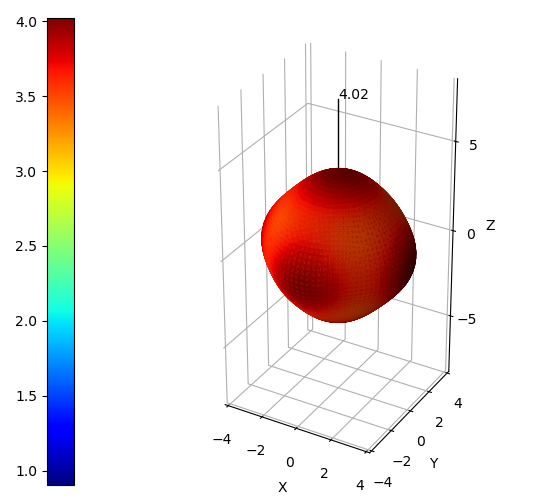

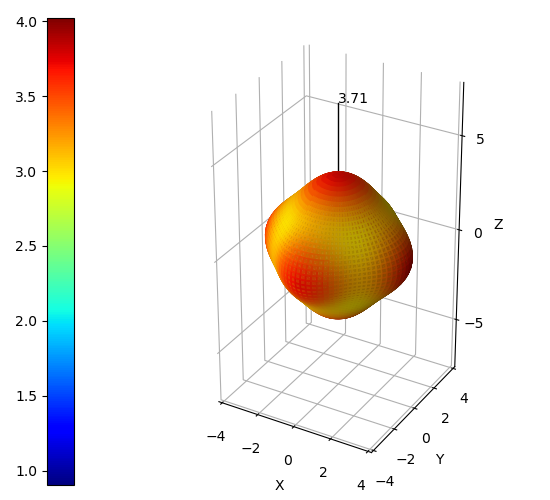

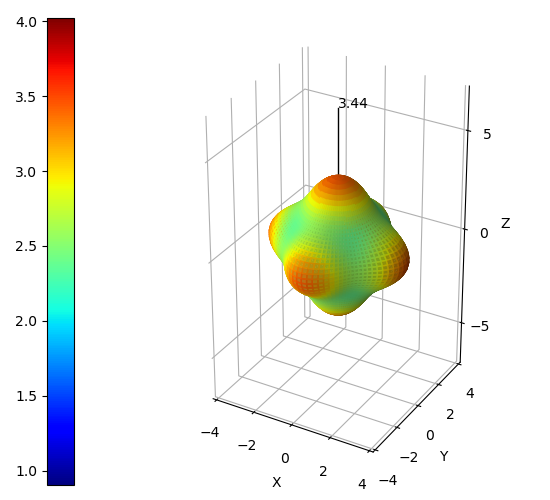

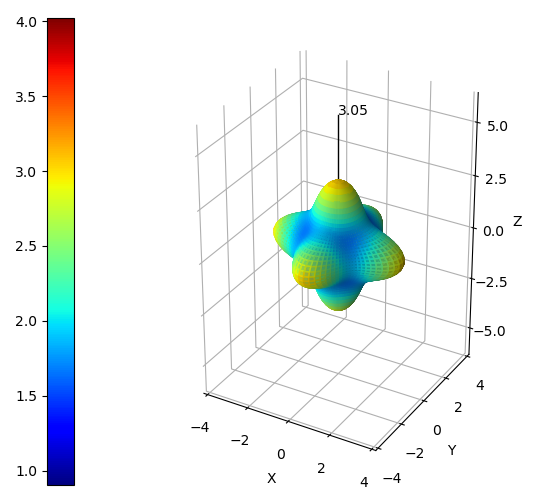

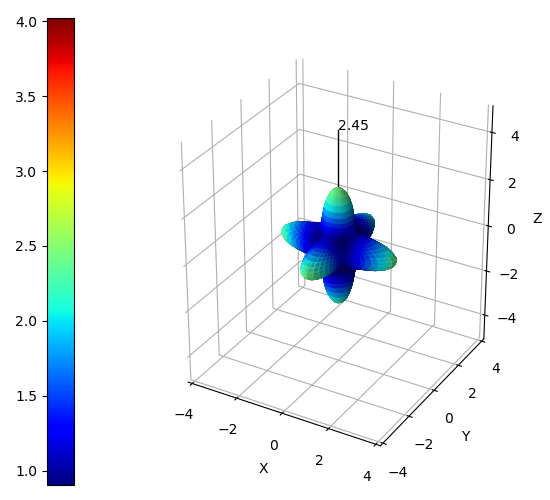

In [11]:
from CRYSTALpytools.plot import plot_elastics_3D, plot_elastics_2D

figs, axes = plot_elastics_3D('young',
                              'elastic3D_ZIF8_P0.out',
                              'elastic3D_ZIF8_P01.out',
                              'elastic3D_ZIF8_P02.out',
                              'elastic3D_ZIF8_P03.out',
                              'elastic3D_ZIF8_P04.out',
                              u='max', utext='value', add_title=False)

### Poisson Ratio

### Collection of 2D plots

It can be used for either 3D or 2D systems.

Plot all the properties on the \(1 0 0\) plane of ZIF8 and annotate the \[0 1 0\] direction with values

/tmp/ipykernel_5851/1228031775.py:1: UserWarning:

'uniform_scale_2D' cannot be used for multiple proeprties of the same system. Using 'uniform_scale_2D = False'.



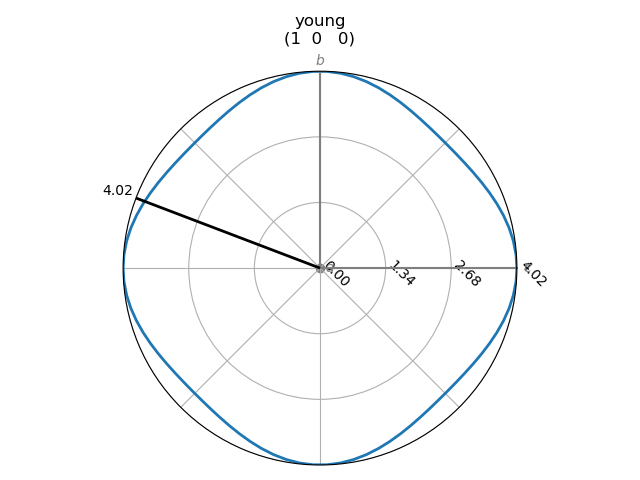

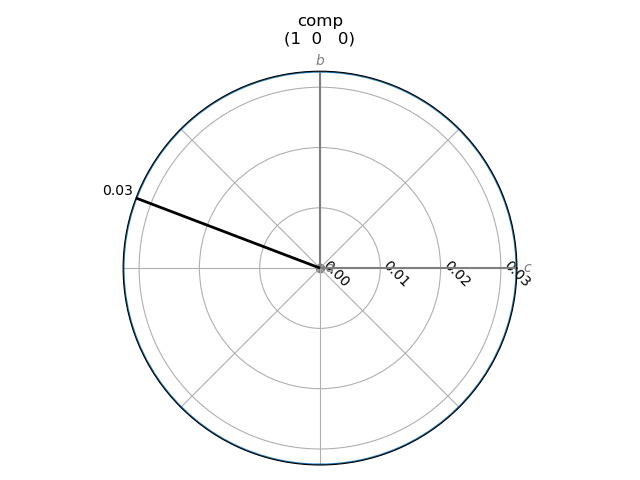

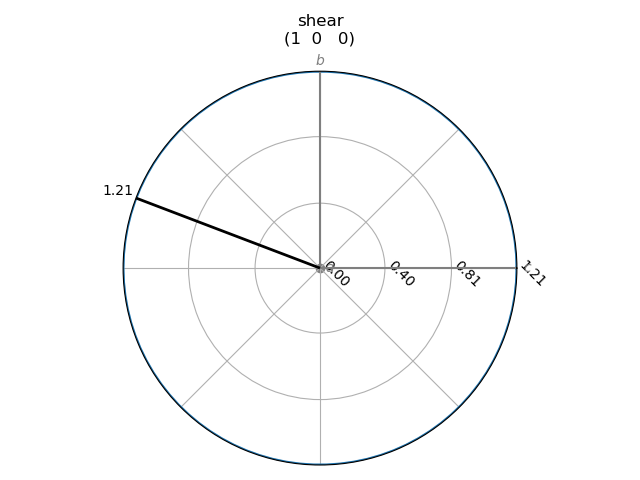

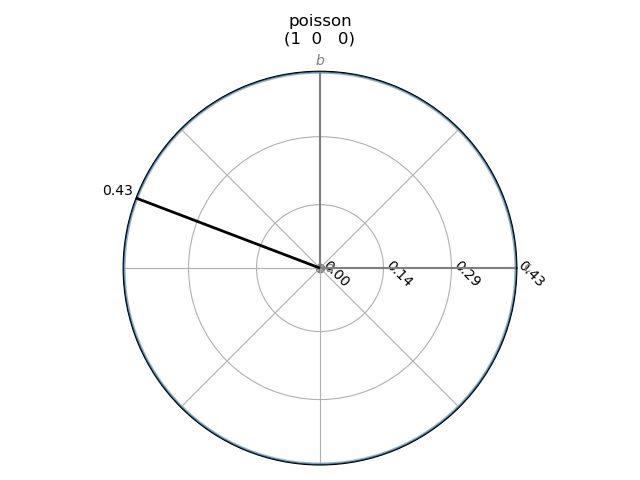

In [14]:
figs, axes = plot_elastics_2D(['young', 'comp', 'shear', 'poisson'],
                              t3d, plane=[1, 0, 0], plane_definition='miller',
                              u=[0, 1, 0], utext='value')

For 2D systems, their properties can be plotted into the same figure. Plot all the properties of graphene:

/tmp/ipykernel_5851/3890217995.py:1: UserWarning:

'uniform_scale_2D' cannot be used for multiple proeprties of the same system. Using 'uniform_scale_2D = False'.



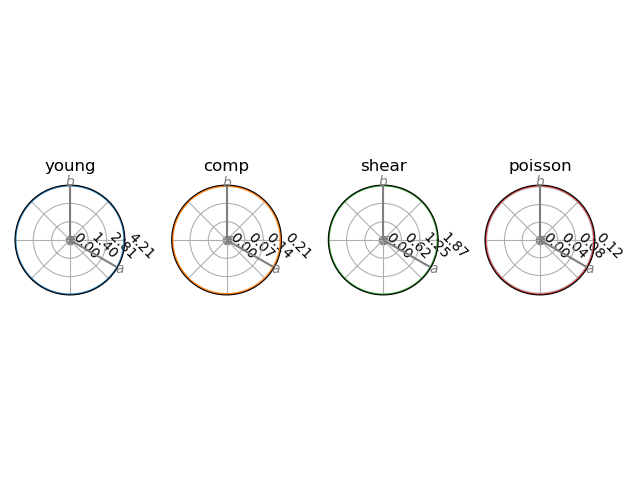

In [15]:
figs, axes = plot_elastics_2D(['young', 'comp', 'shear', 'poisson'],
                              t2d, same_fig_2D=True)

Boring isotropic figures :-)

Do remember to check the odule-specific documentations.